(16)=
# Chapter 16: Bioinformations with Biopython

Bioinformatics is the field of working with biological or biochemical data using computing resources, and while the data is fundamentally no different than the data seen so far, this field is large and significant enough to warrant its own chapter. More importantly, bioinformatics contains a multitude of different file formats making this a significant hurdle in working with these data. The good news is that these file formats are usually text files like seen in the previous chapters, and there are Python libraries available to facilitate the parsing and working with these file formats and data. This chapter will start by looking at a few common file formats, parsing them with our own code followed by introducing the biopython library to perform the heavy lifting.

This chapter will be utilizing the biopython library which  which is among the well-known libraries for working with biological and biochemical data. It will need to be installed in Anaconda and Google Colab as it is not a standard library. As of this writing, it can be installed [using pip](https://biopython.org/wiki/Download) by `pip install biopython`. Once installed, it is imported as `Bio`. This chapter assums the following imports.

In [47]:
import Bio
from Bio import PDB, SeqIO, SeqUtils

import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)

import matplotlib.pyplot as plt

(16.1)=
## 16.1 [FINISH] Working with Sequences

Among the most fundimental data in bioinformatics is sequence data which simply provides the order of monomers in a sequence of nucleotides or amino acids. For protein sequences, these monomers are mainly the 20 common amino acids, but other less frequent amino acids and other species may be present, and for nucleic acid sequences, these are nucleotide bases. 
- import fasta files
- GC content
- transcription/translation
- sequence alignment

(16.2.1)=
### 16.2.1 Reading FASTA Files with Biopython

There are numberous file formats that can store sequence data, but for the examples in this section, we will focus on the FASTA file format which only holds the sequence data and some metadata (i.e., data about the data). FASTA files are fundimentally just text files that look like the following when opened in a text editor. The first line begins with a > and includes helpful information about the sequence such as the organism and what specific molecule it belongs to or codes for. The rest of the file is sequence information. There is no strict rule on how many letters can be contained in each line, but 70 is a common length.

>\>7AIZ_1|Chains A, D|Nitrogenase vanadium-iron protein alpha chain|Azotobacter vinelandii (354)
MPMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIH
MPMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIH
GPLGCAYDTWHTKRYPTDNGHFNMKYVWSTDMKESHVVFGGEKRLEKSMHEAFDEMPDIKRMIVYTTCPT
ALIGDDIKAVAKKVMKDRPDVDVFTVECPGFSGVSQSKGHHVLNIGWINEKVETMEKEITSEYTMNFIGD
FNIQGDTQLLQTYWDRLGIQVVAHFTGNGTYDDLRCMHQAQLNVVNCARSSGYIANELKKRYGIPRLDID
SWGFNYMAEGIRKICAFFGIEEKGEELIAEEYAKWKPKLDWYKERLQGKKMAIWTGGPRLWHWTKSVEDD
LGVQVVAMSSKFGHEEDFEKVIARGKEGTYYIDDGNELEFFEIIDLVKPDVIFTGPRVGELVKKLHIPYV
NGHGYHNGPYMGFEGFVNLARDMYNAVHNPLRHLAAVDIRDKSQTTPVIVRGAA






In [2]:
len('MPMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMI')

69

In [36]:
mouse = SeqIO.parse('data/hemoglobin_mRNA_mouse.fasta', 'fasta')

In [37]:
for record in mouse:
    print(record.id)
    print(record.seq)
    print(record.description)

NM_008218.2
GACACTTCTGATTCTGACAGACTCAGGAAGAAACCATGGTGCTCTCTGGGGAAGACAAAAGCAACATCAAGGCTGCCTGGGGGAAGATTGGTGGCCATGGTGCTGAATATGGAGCTGAAGCCCTGGAAAGGATGTTTGCTAGCTTCCCCACCACCAAGACCTACTTCCCTCACTTTGATGTAAGCCACGGCTCTGCCCAGGTCAAGGGTCACGGCAAGAAGGTCGCCGATGCTCTGGCCAATGCTGCAGGCCACCTCGATGACCTGCCCGGTGCCCTGTCTGCTCTGAGCGACCTGCATGCCCACAAGCTGCGTGTGGATCCCGTCAACTTCAAGCTCCTGAGCCACTGCCTGCTGGTGACCTTGGCTAGCCACCACCCTGCCGATTTCACCCCCGCGGTGCATGCCTCTCTGGACAAATTCCTTGCCTCTGTGAGCACCGTGCTGACCTCCAAGTACCGTTAAGCTGCCTTCTGCGGGGCTTGCCTTCTGGCCATGCCCTTCTTCTCTCCCTTGCACCTGTACCTCTTGGTCTTTGAATAAAGCCTGAGTAGGAAGAAAAAAAAAAAA
NM_008218.2 Mus musculus hemoglobin alpha, adult chain 1 (Hba-a1), mRNA


This is a one-time use object. Running the same code below gives no output.

In [35]:
for record in mouse:
    print(record.id)
    print(record.seq)
    print(record.description)

In [39]:
sequences = SeqIO.parse('data/rcsb_pdb_7AIZ.fasta', 'fasta')

In [40]:
for sequence in sequences:
    print(sequence.id)

7AIZ_1|Chains
7AIZ_2|Chains
7AIZ_3|Chains


(16.2.2)=
### 16.2.2 GC Content of Nucleotide Sequence

```{index} GC content
```

One piece of information we can extract from a nucleotide sequence is the GC content. In DNA, for example, there are two complementary strands hydrogen bonded together which contain the base pairs adenosine(A)/thymine(T) and guanidine(G)/cytosine(C), so the number of adenosines equals the number of thymines and the number of guanidines equals the number of cytosines. However, the number of A/T pairs does not neccesarily equal the number of G/C pairs. The ratio of G/C to A/T can have an effect on the stability of a DNA structure among other things. The *GC content* of DNA is the percent of total bases that are G/C.

$$ GC \,\, content = \frac{G + C}{G + C + A + T}  $$

Below, we will calculate the GC content of a DNA sequence in a FASTA using Biopython's `gc_fraction(seq)` function which accepts a Biopython sequence and returns the GC content in fraction form. 

Sometimes there are characters in a DNA seuqence other than A, T, C, and G due to ambiguities among other reasons. The `N` means that the base is unidentifiable while `S` means it is C or G and `W` means it is either A or T. The `gc_fraction()` function provides a parameter

| Option | Description |
|-------|--------------|
|`'remove'`| Default setting; uses 'ATCGSW' characters and ignores the rest |
|`'weighted'`| |
`'ignore'` | |

In [64]:
rat = SeqIO.parse('data/DNA_sequence.fasta', 'fasta')
rat_seq = [x.seq for x in rat]

SeqUtils.gc_fraction(*rat_seq)

0.5296912114014252

(16.2.3)=
### 16.2.3 Hamming Distance

In [7]:
dna1 = 'ATCCTGCATTAGGGAGCTTTTATTGCCCAATAGCTA'
dna2 = 'ATCCTGGATTAGGGAGCATTTATTGCCCAATAGGTA'

In [8]:
dna = zip(dna1, dna2)

hamming = 0
for position in dna:
    if position[0] != position[1]:
        hamming += 1

print(hamming)

3


In [9]:
from scipy.spatial import distance
dist = distance.hamming(list(dna1), list(dna2))

In [10]:
dist * len(dna1)

3.0

(16.2.4)=
### 16.2.4 Sequence Alignment

(16.2.5)=
### 16.2.5 Longest Common Sequence

(16.2)=
## 16.2 Structural Information

In this second section, we will look at two common file formats for storing biochemical data: PDB and mmCIF. One thing these file formats have in common is that they are all text files, so information can always be extracted using pure Python code you wrote yourself. However, there are also preexisting tools that can make this process substantially easier such as [biopython](https://biopython.org/) or [scikit-bio](http://scikit-bio.org/). Below you will see demonstrations of both approaches with an emphasis on using preexisting tools.

Protein Database (PDB) and Macromolecular Crystallographic Information File (mmCIF) files are designed to hold protein sequence and structural information while the fasta file format only holds sequence data for proteins and nucleic acids. The fasta file format is simpler than the PDB and mmCIF file formats, but there is significant amounts of structural data contained in the former formats not provided with just the sequence.

(16.2.1)=
### 16.2.1 Reading PDB Files with Python

The PDB file format is a classic file format for holding protein sequence and structual information including the information listed below. While the PDB is being slowly replaced by the mmCIF discussed below, the PDB file format is still quite common and worth looking at.

- Amino acid sequence
- Number of strands
- Location and identity of non-amino acid species
- *xyz* coordinates of atoms in the crystal structure including trapped solvents
- Metadata about the protein (e.g., date collected, resolutin, etc...)
- Secondary structure information 

PDB files are text files with the data arranged with specific line labels and infromation within a line is identified based on *position* in a line. This is in constrast to many other file types where data in a single line is distinguished by seperators such as commas or spaces. For more information on PDB file formats, see the [Protein Data Bank website](https://www.wwpdb.org/documentation/file-format).

First, we need a PDB file a protein structure which can be downloaded for free from the [RCSB Protein Data Bank](https://www.rcsb.org/).  Select any protein that you find interesting and download the PDB file by clicking the **Download Files** menu on the top right and selecting **PDF Format**. While you're at it, also download the mmCIF (***PDBx/mmCIF Format**) and fasta (**FASTA Sequence**) files for your protein structure becasue we will look at those next. In the example below, we will look at Vanadium nitrogenase VFe protein in the **7aiz.pdf** file.

If you are using Jupyter Lab, you can double click the PDB file to view the contents. The file is organized where each line holds a different type of information, and the far left of each line includes a label in all caps indicating what type of information is stored in each line. Below are some key labels (i.e., record type), but this is far from a comprehensive list.

| Record Type | Description          |
|-------------|-------------------------|
|Header       | Name of protein and date |
|TITLE        | Name of protein          |
|COMPND       | Information about the compound |
|SOURCE       | Information about the source of the protein (e.g., source organism) |
|SEQRES       | Amino acid sequence and which strand each belongs         |
|HET, HETNAM       | Information about non-amino acids in protein structure    |
|HELIX        | Information about helicies including type, start and end amino acids, etc...|
|SHEET        | Information about sheets including start and end amino acids and sense |
|ATOM         | Information about indificiaul atoms in structure inclidng *xyz* coordinates, identity, amino acid, etc...|
|

Before we begin using biopython to extract information from data files, we will use pure Python as shown below. This code opens the PDB file and appends each line as an item in a list called `data`. We can manually examine a few of the lines to see information about the structure of the protein. Below we see information about the helicies and sheets.

In [11]:
file = 'data/7aiz.pdb'

data = []
with open(file, 'r') as f:
    for line in f:
        data.append(line)

In [12]:
data[1190:1200]

['HELIX  109 AM1 ARG F   24  THR F   44  1                                  21    \n',
 'HELIX  110 AM2 THR F   52  PHE F   73  1                                  22    \n',
 'HELIX  111 AM3 PRO F   74  GLN F   78  5                                   5    \n',
 'HELIX  112 AM4 ASN F   80  ILE F  100  1                                  21    \n',
 'SHEET    1 AA1 6 ILE A  19  LEU A  21  0                                        \n',
 'SHEET    2 AA1 6 TYR A 380  ASP A 383 -1  O  TYR A 381   N  TYR A  20           \n',
 'SHEET    3 AA1 6 GLN A 354  SER A 360  1  N  MET A 358   O  TYR A 380           \n',
 'SHEET    4 AA1 6 LYS A 330  THR A 335  1  N  MET A 331   O  GLN A 354           \n',
 'SHEET    5 AA1 6 VAL A 401  THR A 404  1  O  PHE A 403   N  ALA A 332           \n',
 'SHEET    6 AA1 6 TYR A 419  ASN A 421  1  O  VAL A 420   N  ILE A 402           \n']

As an exercise, we can extract information about the $\beta$-sheets in the protein. Specifically, we will look at the sense which is whether two strands run in the same direction (parallel) or in the opposite direction (antiparallel). This is indicated by the an integer in positions 39-40 of a SHEET line and can be either `0` for the first strand of a $\beta$-sheet, `1` for a strand parallel with the previous strand, and `-1` for a strand antiparallel with the previous strand. The function below extract this information by opening the PDB `file`, moving through each line of the file, and if the line begins with `SHEET`, it appends the sense to a list and returns the populated list.

In [13]:
def get_sheet_direction(file):
    '''Accepts a PDB files name (string) and returns a list
    of values indicating if a strand starts a beta sheet (0),
    strand is parallel to the previous strand (1), or is
    anti-parallel to the previous strand (-1).
    
     >>> ('1abc.pdb') -> [0, 1, 1, 1, -1]
    '''
    
    structure_list = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                sense = int(line[38:40].strip())
                structure_list.append(sense)
    
    
    return structure_list

In [14]:
sheet_sense = get_sheet_direction('data/7aiz.pdb')
print(sheet_sense)

[0, -1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, -1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]


Text(0, 0.5, 'Count')

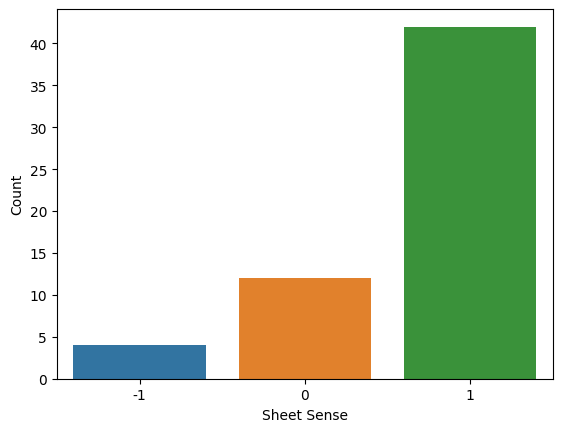

In [15]:
import seaborn as sns
sns.countplot(x=sheet_sense, order=[-1, 0, 1])

plt.xlabel('Sheet Sense')
plt.ylabel('Count')

According to the above plot above, parallel $\beta$-sheet strands are significantly more prevalent in this protein structure than antiparallel strands. This might be different for different proteins, so we will expand this analysis to a folder full or protein structures.

In [16]:
import os

current_directory = os.getcwd()
data_folder = os.path.join(current_directory, 'data/proteins')

sheet_sense = []
for file in os.listdir('data/proteins'):
    if file.endswith('pdb'):
        sheet_sense.extend(get_sheet_direction(os.path.join(data_folder,file)))

Text(0, 0.5, 'Count')

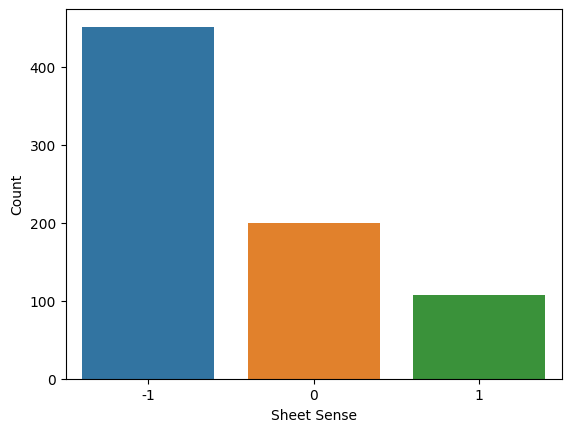

In [17]:
sns.countplot(x=sheet_sense, order=[-1, 0, 1])
plt.xlabel('Sheet Sense')
plt.ylabel('Count')

The trend is over a larger sample of proteins is that antiparallel is significantly more common than parallel, so it seems that the 7aiz protein structure is an exception to the typical rule. However, this is still little over a dozen structures, so it would require a much larger data set ot be certain of this trend.

(16.2.2)=
### 16.2.2 Reading PDB Files with Biopython

Next, we will use the biopython library to read data from PDB files. One of the appeals of using biopython is that the user does not need to understand the strucutre of the PDB file format; biopython handles extracting the desired information from the data file in the background. 

First, we need to import the `PDB` of the biopython library with the `import Bio.PDB` command (see [start of this chapter](16)) if you have not done so already. Biopython, like SciPy, requires that indivifual modules be imported one at a time instead of the entire library (i.e., you can't just type `import Bio`). If you prefer to import a function individually or module into the global namesapce to shorten your function calls (i.e., `from Bio.PDB import *` or `from Bio.PDB import PDBParser()`), you are welcome to do this, but herein we will use `import Bio.PDB` so that the code more clearly shows the source of every function. This module provides tools for dealing with the 3D structural data of macromolecules, such as proteins and DNA. Despite the name, the `PDB` module has tools for also dealing with the mmCIF, PQR, and MMTF file formats. 

To parse the PDB file, we first create a **parser object** using the `Bio.PDB.PDBParser()` function. Like previous functions, we need to include the name of the library/module it is in, so in this case, `Bio.PDB.PDBParser()` means the `PDBParser()` function in the `PDB` module of the `Bio` (biopython) library. We will also want to attach our parser object to a variable.

In [18]:
parser = PDB.PDBParser()

We will then use the `get_structure()` function to read in data from a PDB file. This function requires two positional arguments - a name for the structure and the name of the file. Both arguments are strings. 

In [19]:
structure = parser.get_structure('7aiz', 'data/7aiz.pdb')

The structural data extracted from the PDB by biopython is organized in the hierarchal order of **structure** $\rightarrow$ **model** $\rightarrow$ **chain** $\rightarrow$ **residue** $\rightarrow$ **atom**. The structure is the protein, the model is a particular 3D model of the protein, the chain is a single peptide chain in the protein, the residue is single amino acid residue in the chain, and the atom is each atom within a given amino acid residue. 

| Level    |    Description      |
|:----------:|:---------------------|
|Structure   | Protein strucutre; may contain multiple models     |
|Model       | Particular 3D structure of the protein  |
|Chain       | Individual pepetide chain in the protein  |
|Residue     | Amino acid residue in a given chain |
|Atom        | Atoms in a particular amino acid residue |

While PDB files can contain multiple structures of a protein, most only contain one. Even though there is only one model in our data, we will need to access the first (and only) model using indexing. For the first protein model, use `structure[0]`, and if there were a second, it would be `structure[1]`.

In [20]:
protein_model = structure[0]

We can obtain information about the protein model using the following methods. 

| Attribute/Function | Description                 |
| -------- | -----------                 |
|`center_of_mass()` | Returns 3D coordiantes of a chain's center of mass |
|`child_dict` | Returns a dictionary with all amino acids and molecules (e.g., water) within a chain |
|`get_id()`    | Returns the ID of a chain |
|`get_parent()` | Returns the model to which the chain belongs |

We can also iterate through the protein model to see that we have six chains A $\rightarrow$ F.

In [21]:
protein_model.center_of_mass()

array([106.83214 ,  15.709563, 131.85027 ], dtype=float32)

In [22]:
for chain in protein_model:
    print(chain)

<Chain id=A>
<Chain id=B>
<Chain id=C>
<Chain id=D>
<Chain id=E>
<Chain id=F>


The above information is not the most enlightening, so lets look at the peptide sequences in this protein structure by initiating (i.e., creating) a polypeptide builder object using the using `PDB.PPBuilder()` and then building the polypetides using the `build_peptides()` method. The `build_peptides()` function accepts the structure as the one required piece of information and by default only returns standard amine acids in the peptide chains unless the `aa_only=False` optional argument is included. The pepetide information below is stored in the variable `peptides` which shows the six peptide chains in this particular protein structure along with sequence identifier integers that indication the position of the amino acid along the peptide chain.

In [23]:
ppb = PDB.PPBuilder()
peptides = ppb.build_peptides(structure[0])

peptides

[<Polypeptide start=2 end=474>,
 <Polypeptide start=12 end=475>,
 <Polypeptide start=2 end=113>,
 <Polypeptide start=2 end=474>,
 <Polypeptide start=11 end=475>,
 <Polypeptide start=3 end=113>]

We can iterate through the PolyPeptide object called `peptides` to get the individual peptide chains. With the peptide chains, we can obtain information about the peptide chain including the names of amino acids, phi ($\phi$) and psi ($\psi$) angles, etc., using the various methods tabulated below.

| Attribute/Function | Description                 |
| -------- | -----------                 |
|`get_sequence()` |'Returns the squence of each strand using single-letter amino acid codes' |
|`get_phi_psi_list()` | 'Returns a list of phi and psi dihedral angles in radians along peptide chain' |
|`get_ca_list()`    | 'Returns list of alpha carbons in peptide chain' |
|`get_theta_list()`    | 'Returns a list of theta angles in radians' |
|`get_tau_list()` | 'Returns list of tau torsional angles in radians' |

In the example below, we iterate through the peptide strands in `peptides` and print the amine acid sequence in single-letter code.

In [24]:
for strand in peptides:
    pp = strand.get_sequence()
    print(pp)

PMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIHGPLGCAYDTWHTKRYPTDNGHFNMKYVWSTDMKESHVVFGGEKRLEKSMHEAFDEMPDIKRMIVYTTCPTALIGDDIKAVAKKVMKDRPDVDVFTVECPGFSGVSQSKGHHVLNIGWINEKVETMEKEITSEYTMNFIGDFNIQGDTQLLQTYWDRLGIQVVAHFTGNGTYDDLRCMHQAQLNVVNCARSSGYIANELKKRYGIPRLDIDSWGFNYMAEGIRKICAFFGIEEKGEELIAEEYAKWKPKLDWYKERLQGKKMAIWTGGPRLWHWTKSVEDDLGVQVVAMSSKFGHEEDFEKVIARGKEGTYYIDDGNELEFFEIIDLVKPDVIFTGPRVGELVKKLHIPYVNGHGYHNGPYMGFEGFVNLARDMYNAVHNPLRHLAAVDIRDKSQTTPVIVRGAA
AEVKLSPRDREGIINPMYDCQPAGAQYAGIGIKDCIPLVHGGQGCTMFVRLLFAQHFKENFDVASTSLHEESAVFGGAKRVEEGVLVLARRYPNLRVIPIITTCSTEVIGDDIEGSIRVCNRALEAEFPDRKIYLAPVHTPSFKGSHVTGYAECVKSVFKTITDAHGKGQPSGKLNVFPGWVNPGDVVLLKRYFKEMDVEANIYMDTEDFDSPMLPNKSIETHGRTTVEDIADSANALATLSLARYEGNTTGELLQKTFAVPNALVNTPYGIKNTDDMLRKIAEVTGKEIPESLVRERGIALDALADLAHMFFANKKVAIFGHPDLVLGLAQFCMEVELEPVLLLIGDDQGNKYKKDPRIEELKNTAHFDIEIVHNADLWELEKRINAGLQLDLIMGHSKGRYVAIEANIPMVRVGFPTFDRAGLYRKPSIGYQGAMELGEMIANAMFAHMEYTRNKEWILNTW
SQSHLDDLFAYVEERCLWQFFSRTWDREENIEGVLNQVGRLLTGQEPLRGTPQERLFYADA

(16.2.3)=
### 16.2.3 Reading mmCIF Files with Biopython

The **mmCIF** file format is the successor to the PDB format. An advantage of using biopython to parse files is that the code for dealing with PDB and mmCIF files are almost identical as biopython deals with the details of the file structures behind the scenes. The only difference in dealing with mmCIF files verus PDB in biopython is that we use the `PDB.MMCIFParder()` function to read the file instead of `PDB.PDBParser()`.

In [25]:
parser = PDB.MMCIFParser()
structure = parser.get_structure('7aiz', 'data/7aiz.cif')
peptides = PDB.PPBuilder().build_peptides(structure[0])

for strand in peptides:
    print(strand.get_sequence())

PMVLLECDKDIPERQKHIYLKAPNEDTREFLPIANAATIPGTLSERGCAFCGAKLVIGGVLKDTIQMIHGPLGCAYDTWHTKRYPTDNGHFNMKYVWSTDMKESHVVFGGEKRLEKSMHEAFDEMPDIKRMIVYTTCPTALIGDDIKAVAKKVMKDRPDVDVFTVECPGFSGVSQSKGHHVLNIGWINEKVETMEKEITSEYTMNFIGDFNIQGDTQLLQTYWDRLGIQVVAHFTGNGTYDDLRCMHQAQLNVVNCARSSGYIANELKKRYGIPRLDIDSWGFNYMAEGIRKICAFFGIEEKGEELIAEEYAKWKPKLDWYKERLQGKKMAIWTGGPRLWHWTKSVEDDLGVQVVAMSSKFGHEEDFEKVIARGKEGTYYIDDGNELEFFEIIDLVKPDVIFTGPRVGELVKKLHIPYVNGHGYHNGPYMGFEGFVNLARDMYNAVHNPLRHLAAVDIRDKSQTTPVIVRGAA
AEVKLSPRDREGIINPMYDCQPAGAQYAGIGIKDCIPLVHGGQGCTMFVRLLFAQHFKENFDVASTSLHEESAVFGGAKRVEEGVLVLARRYPNLRVIPIITTCSTEVIGDDIEGSIRVCNRALEAEFPDRKIYLAPVHTPSFKGSHVTGYAECVKSVFKTITDAHGKGQPSGKLNVFPGWVNPGDVVLLKRYFKEMDVEANIYMDTEDFDSPMLPNKSIETHGRTTVEDIADSANALATLSLARYEGNTTGELLQKTFAVPNALVNTPYGIKNTDDMLRKIAEVTGKEIPESLVRERGIALDALADLAHMFFANKKVAIFGHPDLVLGLAQFCMEVELEPVLLLIGDDQGNKYKKDPRIEELKNTAHFDIEIVHNADLWELEKRINAGLQLDLIMGHSKGRYVAIEANIPMVRVGFPTFDRAGLYRKPSIGYQGAMELGEMIANAMFAHMEYTRNKEWILNTW
SQSHLDDLFAYVEERCLWQFFSRTWDREENIEGVLNQVGRLLTGQEPLRGTPQERLFYADA

In [26]:
chain_A = structure[0]['A']
chain_A

<Chain id=A>

In [27]:
chain_A[43]

<Residue THR het=  resseq=43 icode= >

In [28]:
THR_atoms = chain_A[43].get_unpacked_list()
THR_atoms

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom OG1>, <Atom CG2>]

| Attribute/Function | Description                 |
| -------- | -----------                 |
|`get_name()` |'Returns the name of the atom' |
|`get_coord()` | 'Returns the *xyz* coordinates of the atom as an array' |
|`get_vector()`    | 'Returns the *xyz* coordinates of the atom as a vector' |
|`transform()`    | 'Rotate or translate the atomic coordinates along the *xyz* axes' |

In [29]:
THR_N = THR_atoms[0]
THR_N.get_coord()

array([87.589,  7.166, 96.102], dtype=float32)

In [30]:
THR_N.transform(0, (1,2,1))
THR_N.get_coord()

array([1., 2., 1.])

In [31]:
atoms[1].get_name()

NameError: name 'atoms' is not defined

In [ ]:
for chain in structure[0]:
    print(chain)
    for res in chain.get_residues():
        pass
        #print(res)
        #print(res.get_resname())

In [ ]:
for chain in structure[0]:
    for res in chain.get_residues():
        #print(res.get_atoms())

(16.2.4)=
### 16.2.4 Writing Files with Biopython

Biopython is capable of writing structures to new PDB or mmCIF files, but it will not include much of the metadata (e.g., resolution, name of structure, authors, etc.) and information about secondary structures in the new files.

The general methodology is to first create a writing object using either `PDB.PBDIO()` or `PDB.MMCIFIO()` for creating a new PDB or mmCIF file, respectively. Next, use the `set_structure()` method on the writing object to load the data from an individual structure. Finally, write the file using the `save()` function and providing it with the name of the new file as a string.

In [ ]:
# write a new PDB
io = PDB.PDBIO()
io.set_structure(structure[0])
io.save('new_protein.pdb')

In [ ]:
# write a new mmCIF
io = PDB.MMCIFIO()
io.set_structure(structure[0])
io.save('new_protein.cif')

(16.2.5)=
### 16.2.5 Creating Ramachandran Plots

```{Ramachandran}
```

As an example application, we can generate a Ramachandran plot which visualizes the trends of the psi ($\psi$) versus phi ($\phi$) dihedral angles in amino acids along a peptide chain. While the omega ($\omega$) dihedral angles tend to be flat, the psi ($\psi$) versus phi ($\phi$) dihedral angles tend to exist in distinct ranges.

![peptide_angles](img/tripeptide_gray_sm.png)

The general methodology below is:

1. Parse PDB files in the **data/proteins** folder using a PDB parser
2. Build a PolyPeptide object using a PDB builder
3. Iterate over the peptides and store the psi ($\psi$) and phi ($\phi$) dihedral angles 
4. Plot the results as psi ($\psi$) versus phi ($\phi$) 


In [ ]:
phi, psi  = [], []

current_directory = os.getcwd()
data_folder = os.path.join(current_directory, 'data/proteins')

parser = PDB.PDBParser()
ppb = PDB.PPBuilder()

for file in os.listdir('data/proteins'):
    if file.endswith('pdb'):
        data = parser.get_structure('file', os.path.join(data_folder,file))
        peptides = ppb.build_peptides(structure[0])
        for strand in peptides:
            phi.extend(x[0] for x in strand.get_phi_psi_list()[1:-1])
            psi.extend(x[1] for x in strand.get_phi_psi_list()[1:-1])

In [ ]:
phi[:10]

In [ ]:
plt.scatter(phi, psi, s=1)
plt.xlabel('phi $\phi$, degrees')
plt.ylabel('psi $\psi$, degrees');

You may notice that the first and last dihedral angles were slices off the list of phi and psi angles (last two lines of code). This is becuase there are no phi ($\phi$) values for first amino acid and no psi ($\psi$) values in the last amino acid. Dihedral angle measurements require four atoms, and those terminal amino acids are missing one of the required four atoms. For example, phi ($\phi$) dihedral angles are measured from the N-C$_\alpha$ bond of a C(O)-N-C$_\alpha$-C(O) chain of atoms, but the first amine acids only have N-C$_\alpha$-C(O).

The Ramachandran plot above is in radians which can be converted to degree (1 radian = 180/$\pi$) as is done below.

In [ ]:
import math
psi_deg = [rad * (180 / math.pi) for rad in psi]
phi_deg = [rad * (180 / math.pi) for rad in phi]

plt.scatter(phi_deg, psi_deg, s=1)
plt.xlabel('phi $\phi$, degrees')
plt.ylabel('psi $\psi$, degrees');

Other representations of Ramachandran plots using different plotting types or color coding the markers based on secondary protein structure can be seen in [Notebook 3 of the Visualization of Top8000 Protein Dataset](https://weisscharlesj.github.io/BiopythonRamachandran/VisTop8000_COMPLETE/03Ramachandran/03Ramachandran_Plot_v8.html) mini tutorial.

(16.3)=
## 16.3 Visualizing Biomolecules

(16.3.1)=
### 16.3.1 

(16.3.2)=
### 16.3.2 

(16.3)=
### 16.3


## Further Reading

1. PDB format documentation. https://www.wwpdb.org/documentation/file-format (free resource)

2. Introduction to PDB File Format. https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html (free resource)

3. Biopython Website. https://biopython.org (free resource)

4. Scikit-bio Website. http://scikit-bio.org (free resource)



Cock, P. J. A.; Antao, T.; Chang, J. T.; Chapman, B. A.; Cox, C. J.; Dalke, A.; Friedberg, I.; Hamelryck, T.; Kauff, F.; Wilczynski, B.; De Hoon, M. J. L. Biopython: Freely Available Python Tools for Computational Molecular Biology and Bioinformatics. Bioinformatics 2009, 25, 1422– 1423,

## Exercises

